Analyse the documents that were retrieved from OpenAlex.

In [1]:
import json
from os import listdir
from collections import Counter
from matplotlib import pyplot as plt

In [2]:
docs_folder = '../data/openalex/docs_hierarchy'
subjects_file = '../data/openalex/subjects.json'
subjects = json.load(open(subjects_file))

In [3]:
doc_cnt = {}  # map subjects to their number of docs
for file in listdir(docs_folder):
  docs = json.load(open(f'{docs_folder}/{file}'))
  for subject in docs:
    doc_cnt[subject] = len(docs[subject])
len(doc_cnt)

2157

In [4]:
sum(doc_cnt.values())  # total no. of docs

214538

In [5]:
missing_cnt = {}  # no. of subjects that don't have 100 docs
for subject, cnt in doc_cnt.items():
  if cnt != 100:
    missing_cnt[subject] = cnt
len(missing_cnt)

17

In [6]:
for subject, cnt in missing_cnt.items():
  print(subjects[subject]['name'], cnt)

Fermentation 54
Shoot 0
Exploit 8
Algorithm design 0
Thin film 13
Quantum dot 37
Fly ash 19
Central nervous system disease 45
Journalism 98
Attendance 29
Gauge theory 67
Letter to the editor 84
Social system 63
Seawater 19
Premise 0
Strengths and weaknesses 2
Intensive care unit 0


Are the subjects without their own documents present in other documents?

In [7]:
empty = {subject: 0 for subject, cnt in missing_cnt.items() if cnt == 0}
for file in listdir(docs_folder):
  docs = json.load(open(f'{docs_folder}/{file}'))
  for group in docs.values():
    for doc in group:
      for subject in doc['subjects']:
        if subject in empty:
          empty[subject] += 1
for subject, cnt in empty.items():
  print(subjects[subject]['name'], cnt)

Shoot 325
Algorithm design 0
Premise 0
Intensive care unit 374


These were the docs retrieved for each document, not the total counts of occurrences of each subject, as each doc has multiple subjects, not only the one it was queried for. How often does each subject really occur?

In [8]:
subject_cnt = {subject_id: 0 for subject_id in subjects}
for file in listdir(docs_folder):
  docs = json.load(open(f'{docs_folder}/{file}'))
  for group in docs.values():
    for doc in group:
      for subject in doc['subjects'].keys():
        if subject in subject_cnt:
          subject_cnt[subject] += 1
len(subject_cnt)

2157

In [9]:
sum(subject_cnt.values())  # no. of subject assignments

1890080

How many assignments does each field have?

In [10]:
field_distr = {s_id: 0 for s_id in subjects if subjects[s_id]['level'] == 0}
for file in listdir(docs_folder):
  docs = json.load(open(f'{docs_folder}/{file}'))
  for group in docs.values():
    for doc in group:
      for subject in doc['subjects'].keys():
        if subject in field_distr:
          field_distr[subject] += 1
len(field_distr)

19

In [11]:
sum(field_distr.values())  # no. of times fields are assigned to docs

899628

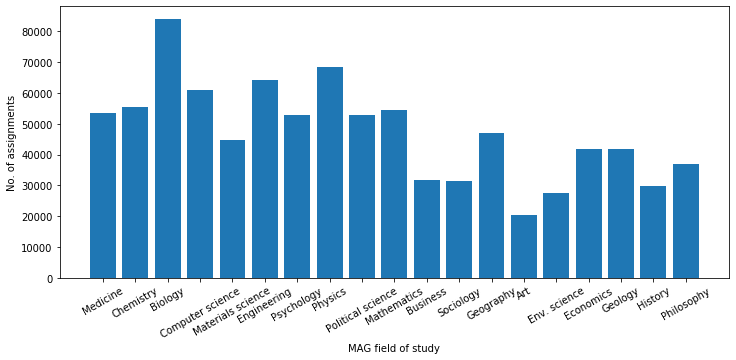

dict_values([53500, 55416, 83825, 60799, 44812, 64148, 52717, 68239, 52878, 54580, 31815, 31584, 47105, 20265, 27491, 41879, 41827, 29674, 37074])

In [12]:
plt.figure(figsize=(12,5))
x = range(len(field_distr))
field_names = [subjects[s]['name'] for s in subjects if s in field_distr]
field_names[field_names.index('Environmental science')] = 'Env. science'
plt.bar(x, field_distr.values())
plt.xticks(x, field_names, rotation=30)
plt.xlabel('MAG field of study')
plt.ylabel('No. of assignments')
plt.show()
field_distr.values()

How many documents don't have a field assigned to them?

In [13]:
no_field = 0
for file in listdir(docs_folder):
  docs = json.load(open(f'{docs_folder}/{file}'))
  for group in docs.values():
    for doc in group:
      has_field = False
      for subject in doc['subjects'].keys():
        if subject in subjects:
          if subjects[subject]['level'] == 0:
            has_field = True
            break
      if not has_field:
        no_field += 1
no_field

0

Count the occurrence of subject sets of docs that don't have fields assigned to them

In [14]:
nofield_cnt = Counter()
for file in listdir(docs_folder):
  docs = json.load(open(f'{docs_folder}/{file}'))
  for group in docs.values():
    for doc in group:
      has_field = False
      for subject in doc['subjects'].keys():
        if subject in subjects:
          if subjects[subject]['level'] == 0:
            has_field = True
            break
      if not has_field:
        s_names = [subjects[s]['name'] for s in subjects if s in doc['subjects'].keys()]
        nofield_cnt[str(sorted(s_names))] += 1
nofield_cnt.most_common(10)

[]

How many of the documents without assigned fields have Mechanics assigned to them?

In [15]:
mechanics_cnt = 0
for assigned, cnt in nofield_cnt.items():
  if "'Mechanics'" in assigned:
    mechanics_cnt += cnt
mechanics_cnt

0

Basic stats

In [16]:
sum(nofield_cnt.values()) / len(nofield_cnt)  # avg. no. of subjects per doc that does not have a field

ZeroDivisionError: division by zero

In [ ]:
sum([v == 1 for v in nofield_cnt.values()])  # no. of subject sets that occur only once (from those of docs that are not assigned fields)

1362

In [ ]:
sum([',' not in k for k in nofield_cnt.keys()]) 

427

In [ ]:
len(nofield_cnt)

1582

How many assignments are there per level?

In [ ]:
level_distr = {lv: 0 for lv in range(6)}
for file in listdir(docs_folder):
  docs = json.load(open(f'{docs_folder}/{file}'))
  for group in docs.values():
    for doc in group:
      for subject in doc['subjects'].keys():
        if subject in subjects:
          level_distr[subjects[subject]['level']] += 1
level_distr

{0: 301059, 1: 98661, 2: 633386, 3: 34058, 4: 1643, 5: 0}

In [ ]:
len(level_distr)

6

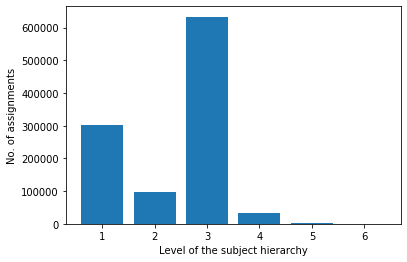

In [ ]:
plt.bar(level_distr.keys(), level_distr.values())
plt.xticks(list(level_distr.keys()), list(range(1, len(level_distr)+1)))
plt.xlabel('Level of the subject hierarchy')
plt.ylabel('No. of assignments')
plt.show()

What are the most popular subjects?

In [ ]:
sorted_cnt = dict(sorted(subject_cnt.items(), key=lambda i: i[1], reverse=True))
sorted_names = {subjects[s]['name']: cnt for s, cnt in sorted_cnt.items()}
show = 0
for subject, cnt in sorted_names.items():
  print(subject, cnt)
  show += 1
  if show == 10:
    break

Medicine 36092
Computer science 35344
Materials science 33864
Psychology 26985
Chemistry 23515
Business 22503
Environmental science 21312
Sociology 14532
Biology 13525
Political science 13449


In [ ]:
show = 0  # top 10 without fields
for subject, cnt in sorted_names.items():
  if subject not in field_names:
    print(subject, cnt)
    show += 1
    if show == 11:
      break

Environmental science 21312
Internal medicine 11424
Chemical engineering 10632
Composite material 9339
Artificial intelligence 8248
Mechanics 5507
Mathematics education 5152
Social psychology 4695
Ecology 4593
Optoelectronics 4574
Soil water 4486


Are there duplicates?

In [ ]:
duplicate_cnt = Counter()
for file in listdir(docs_folder):
  docs = json.load(open(f'{docs_folder}/{file}'))
  for group in docs.values():
    for doc in group:
      duplicate_cnt[str(doc['data'])] += 1
duplicate_cnt.most_common(5)

[('[]', 122),
 ("['meet', 'editorial', 'board', 'member']", 16),
 ("['appeal', 'editor-in-chief', 'abstract']", 15),
 ("['spin', 'crossover', 'cobalt', 'complex', 'co-based', 'complex', 'pypz', 'pyridine', 'pyrazole', 'deposit', 'investigate', 'scan', 'tunneling', 'microscopy', 'tridentate', 'coordination', 'sphere', 'molecule', 'aggregate', 'mainly', 'tetramers', 'individual', 'complex', 'tetramers', 'undergo', 'reversible', 'transition', 'state', 'characteristic', 'image', 'contrast', 'current', 'pass', 'neighbor', 'molecule', 'exhibit', 'bistability', 'molecule', 'stable', 'transition', 'rate', 'vary', 'linearly', 'tunnel', 'current', 'exhibit', 'intriguing', 'dependence', 'bias', 'voltage', 'polarity', 'interpret', 'state', 'spin', 'state', 'complex', 'image', 'contrast', 'orders-of-magnitude', 'variation', 'switching', 'yield', 'tentatively', 'understand', 'calculate', 'orbital', 'structure', 'spin', 'state', 'provide', 'insight', 'mechanism', 'electron-induced', 'excited', 'spin-

In [ ]:
summ = sum([v for v in duplicate_cnt.values() if v > 1])
summ # total number of duplicates

4849

In [ ]:
lenn = len([v for v in duplicate_cnt.values() if v > 1])
lenn# number of duplicated docs

2346

In [ ]:
summ/lenn  # avg. number of duplicates per distinct doc

2.06692242114237

How many distinct documents are there?

In [ ]:
len(duplicate_cnt)

212035